# $2^4$ Factorial Credit Card Example

Import the necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns

Change the working directory

In [2]:
os.chdir("/Users/nstevens/Dropbox/Teaching/MSDS_629/2023/Lectures/Lecture7")

Read in the data and look at it

In [3]:
credit = pd.read_csv('creditcard.csv')
credit.head(10)

,Cond,x1,x2,x3,x4,y
0,1,-1,-1,-1,-1,0
1,1,-1,-1,-1,-1,0
2,1,-1,-1,-1,-1,0
3,1,-1,-1,-1,-1,0
4,1,-1,-1,-1,-1,0
5,1,-1,-1,-1,-1,0
6,1,-1,-1,-1,-1,0
7,1,-1,-1,-1,-1,0
8,1,-1,-1,-1,-1,0
9,1,-1,-1,-1,-1,0


Compute the overall conversion rate.

In [4]:
credit['y'].mean()

0.023641666666666665

Compute the conversion rate in each condition.

In [5]:
credit.groupby(['Cond']).mean('y')

,x1,x2,x3,x4,y
Cond,,,,,
1,-1.0,-1.0,-1.0,-1.0,0.024533
2,1.0,-1.0,-1.0,-1.0,0.033600
3,-1.0,1.0,-1.0,-1.0,0.021600
4,1.0,1.0,-1.0,-1.0,0.022933
5,-1.0,-1.0,1.0,-1.0,0.024933
6,1.0,-1.0,1.0,-1.0,0.033867
7,-1.0,1.0,1.0,-1.0,0.023200
8,1.0,1.0,1.0,-1.0,0.024400
9,-1.0,-1.0,-1.0,1.0,0.018400


Fit the full model with all main effects and interaction terms

In [4]:
model = smf.logit('y ~ x1 * x2 * x3 * x4', data = credit).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.111420
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119984
Method:                           MLE   Df Model:                           15
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                0.004214
Time:                        12:56:49   Log-Likelihood:                -13370.
converged:                       True   LL-Null:                       -13427.
Covariance Type:            nonrobust   LLR p-value:                 3.962e-17
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.7397      0.019   -193.337      0.000      -3.778      -3.702
x1              0.0808      0.019      4.180      0.000       0.043       0.119
x2             -0.1062      0.019     -5.491      0.000      -0.144      -0.068
x1:x2          -0.0552      0.019     -2.852      0.004      -0.093      -0.017
x3              0.0582      0.019      3.011      0.003       0.020       0.096
x1:x3          -0.0048      0.019     -0.248      0.804      -0.043       0.033
x2:x3          -0.0070      0.019     -0.360      0.719      -0.045       0.031
x1:x2:x3       -0.0096      0.019     -0.499      0.618      -0.048       0.028
x4             -0.1081      0.019     -5.588      0.000      -0.146      -0.070
x1:x4          -0.0132      0.019     -0.681      0.496      -0.051       0.025
x2:x4           0.0106      0.019      0.549      0.583      -0.027       0.049
x1:x2:x4        0.0106      0.019      0.549      0.583      -0.027       0.049
x3:x4           0.0381      0.019      1.969      0.049       0.000       0.076
x1:x3:x4       -0.0025      0.019     -0.131      0.895      -0.040       0.035
x2:x3:x4       -0.0209      0.019     -1.083      0.279      -0.059       0.017
x1:x2:x3:x4    -0.0095      0.019     -0.491      0.623      -0.047       0.028
===============================================================================
"""

Fit a reduced model with just the main effects and interactions that appear to be significant

In [5]:
model_red = smf.logit('y ~ x1 + x2 + x3 + x4 + x1:x2 + x3:x4', data = credit).fit()
model_red.summary()

Optimization terminated successfully.
         Current function value: 0.111433
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119993
Method:                           MLE   Df Model:                            6
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                0.004105
Time:                        12:56:53   Log-Likelihood:                -13372.
converged:                       True   LL-Null:                       -13427.
Covariance Type:            nonrobust   LLR p-value:                 1.811e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7396      0.019   -193.306      0.000      -3.778      -3.702
x1             0.0821      0.019      4.279      0.000       0.045       0.120
x2            -0.1083      0.019     -5.644      0.000      -0.146      -0.071
x3             0.0589      0.019      3.072      0.002       0.021       0.096
x4            -0.1107      0.019     -5.777      0.000      -0.148      -0.073
x1:x2         -0.0571      0.019     -2.972      0.003      -0.095      -0.019
x3:x4          0.0405      0.019      2.114      0.034       0.003       0.078
==============================================================================
"""

Let's check whether ths full model fits significantly better than the reduced. We do so with a likelihood ratio test of $$H_0:\beta_{13}=\beta_{14}=\beta_{23}=\beta_{24}=\beta_{123}=\beta_{124}=\beta_{134}=\beta_{234}=\beta_{1234}=0$$

In [8]:
t = 2 * (model.llf - model_red.llf)
pv = stats.chi2.sf(t, df = 9)
print("t = ", t)
print("p-value = ", pv)

t =  2.924363569054549
p-value =  0.9672182496406062


Thus we conclude that the main effects of each factor are significant and so also are the _annual fee by opening fee_ (`x1:x2`) and _initial and long-term interest rate_ (`x3:x4`) interactions. Let us next look at main and interaction effect plots for additional insight into these findings.

(0.01, 0.04)

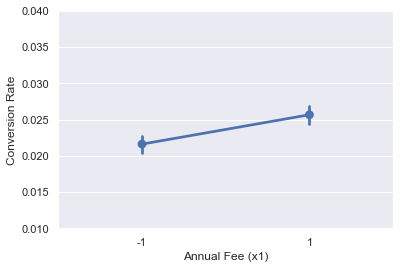

In [9]:
# Main effect of Annual Fee (x1)
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x1", y="y", data=credit)
fig1.set_ylabel("Conversion Rate")
fig1.set_xlabel("Annual Fee (x1)")
fig1.set_ylim(0.01, 0.04)

(0.01, 0.04)

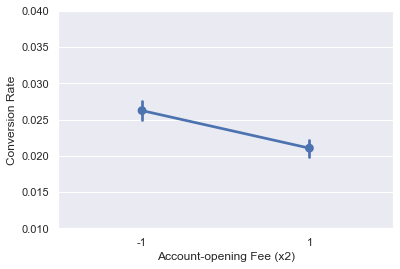

In [10]:
# Main effect of Account-opening Fee (x2)
fig2 = sns.pointplot(x="x2", y="y", data=credit)
fig2.set_ylabel("Conversion Rate")
fig2.set_xlabel("Account-opening Fee (x2)")
fig2.set_ylim(0.01, 0.04)

(0.01, 0.04)

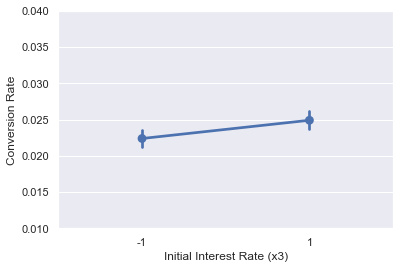

In [11]:
# Main effect of Initial Interest Rate (x3)
fig3 = sns.pointplot(x="x3", y="y", data=credit)
fig3.set_ylabel("Conversion Rate")
fig3.set_xlabel("Initial Interest Rate (x3)")
fig3.set_ylim(0.01, 0.04)

(0.01, 0.04)

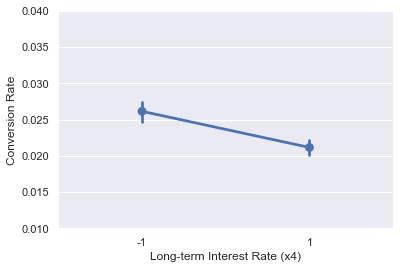

In [12]:
# Main effect of Long-term Interest Rate (x4)
fig4 = sns.pointplot(x="x4", y="y", data=credit)
fig4.set_ylabel("Conversion Rate")
fig4.set_xlabel("Long-term Interest Rate (x4)")
fig4.set_ylim(0.01, 0.04)

(0.01, 0.04)

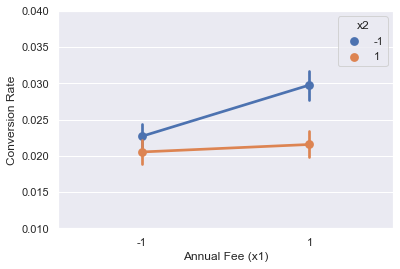

In [13]:
# Interaction between x1 and x2
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="x1", hue="x2", y="y", data=credit)
fig12.set_ylabel("Conversion Rate")
fig12.set_xlabel("Annual Fee (x1)")
fig12.set_ylim(0.01, 0.04)

(0.01, 0.04)

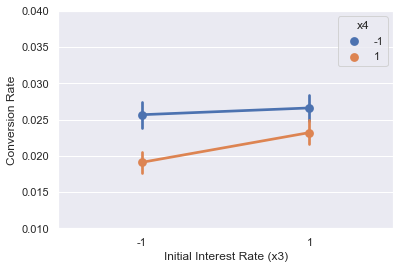

In [14]:
# Interaction between x3 and x4
sns.set_theme(style="darkgrid")
fig34 = sns.pointplot(x="x3", hue="x4", y="y", data=credit)
fig34.set_ylabel("Conversion Rate")
fig34.set_xlabel("Initial Interest Rate (x3)")
fig34.set_ylim(0.01, 0.04)